## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


---


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/Users/roraimachavez/Downloads/7.IRONHACK/Labs/FifthWeek/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
df.shape

(2443651, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [8]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [36]:
# Generate a frequency table for the product category.
# Which are the top 5 most listed product categories?
frequency_table = df["category"].value_counts().head(10)

In [37]:
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64

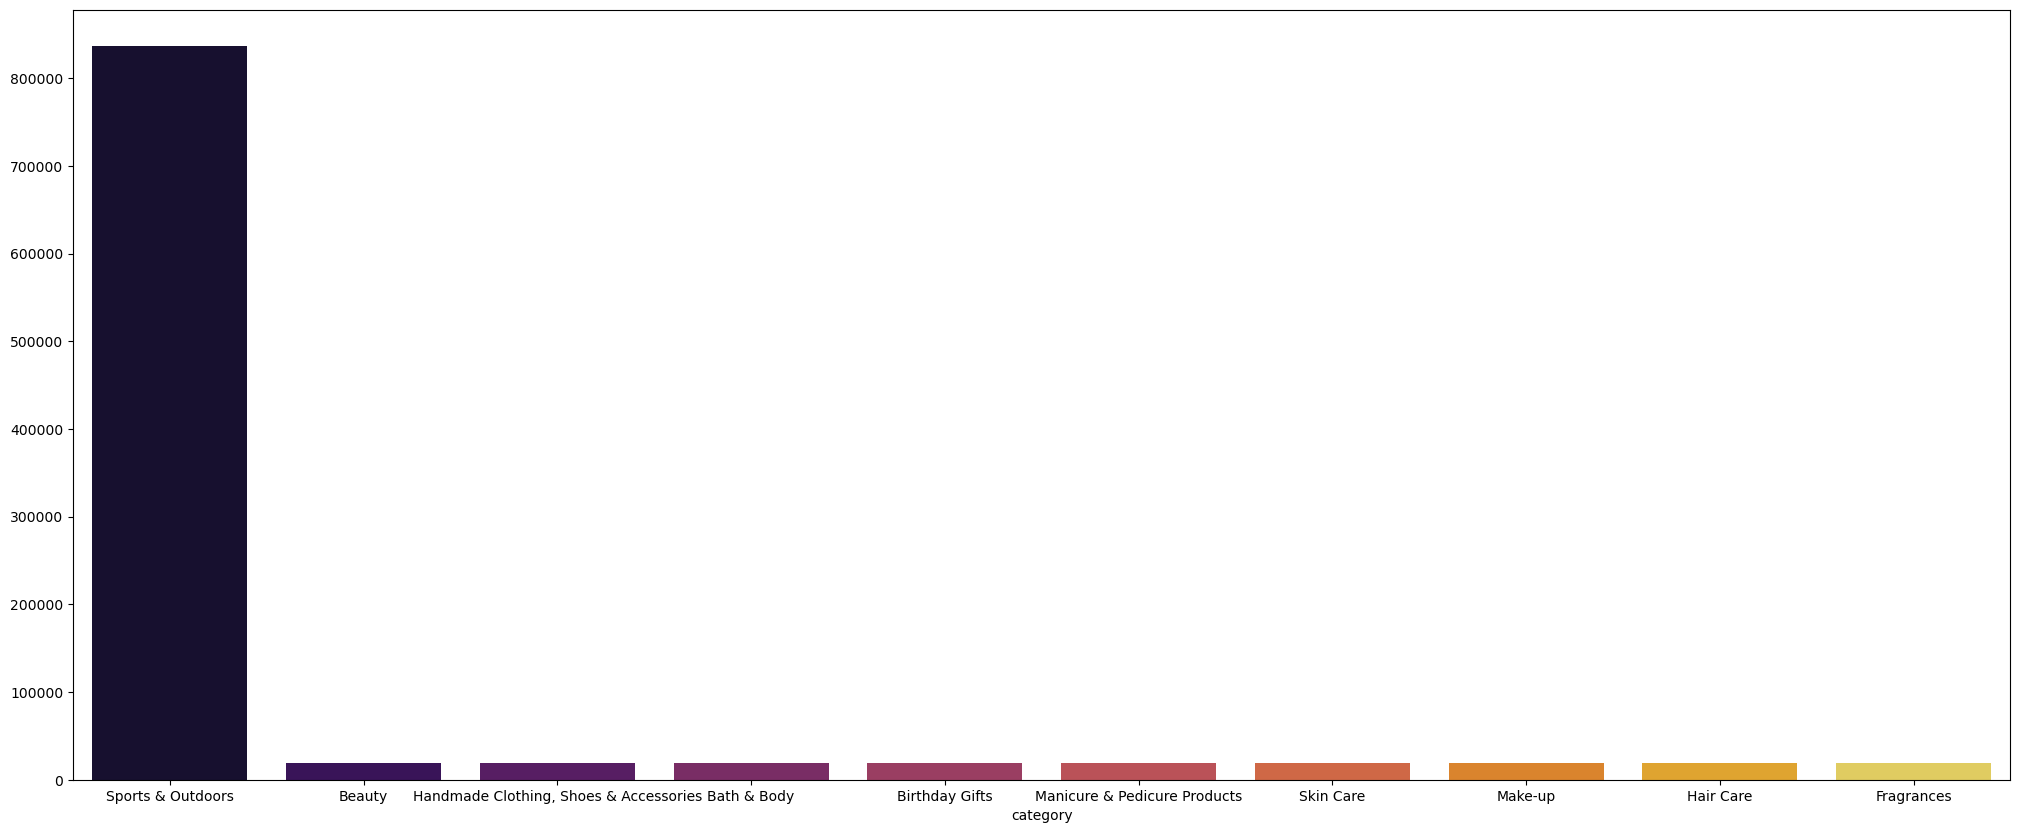

In [73]:
# Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
plt.figure(figsize=(25, 10)) 
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="inferno");

<Axes: ylabel='count'>

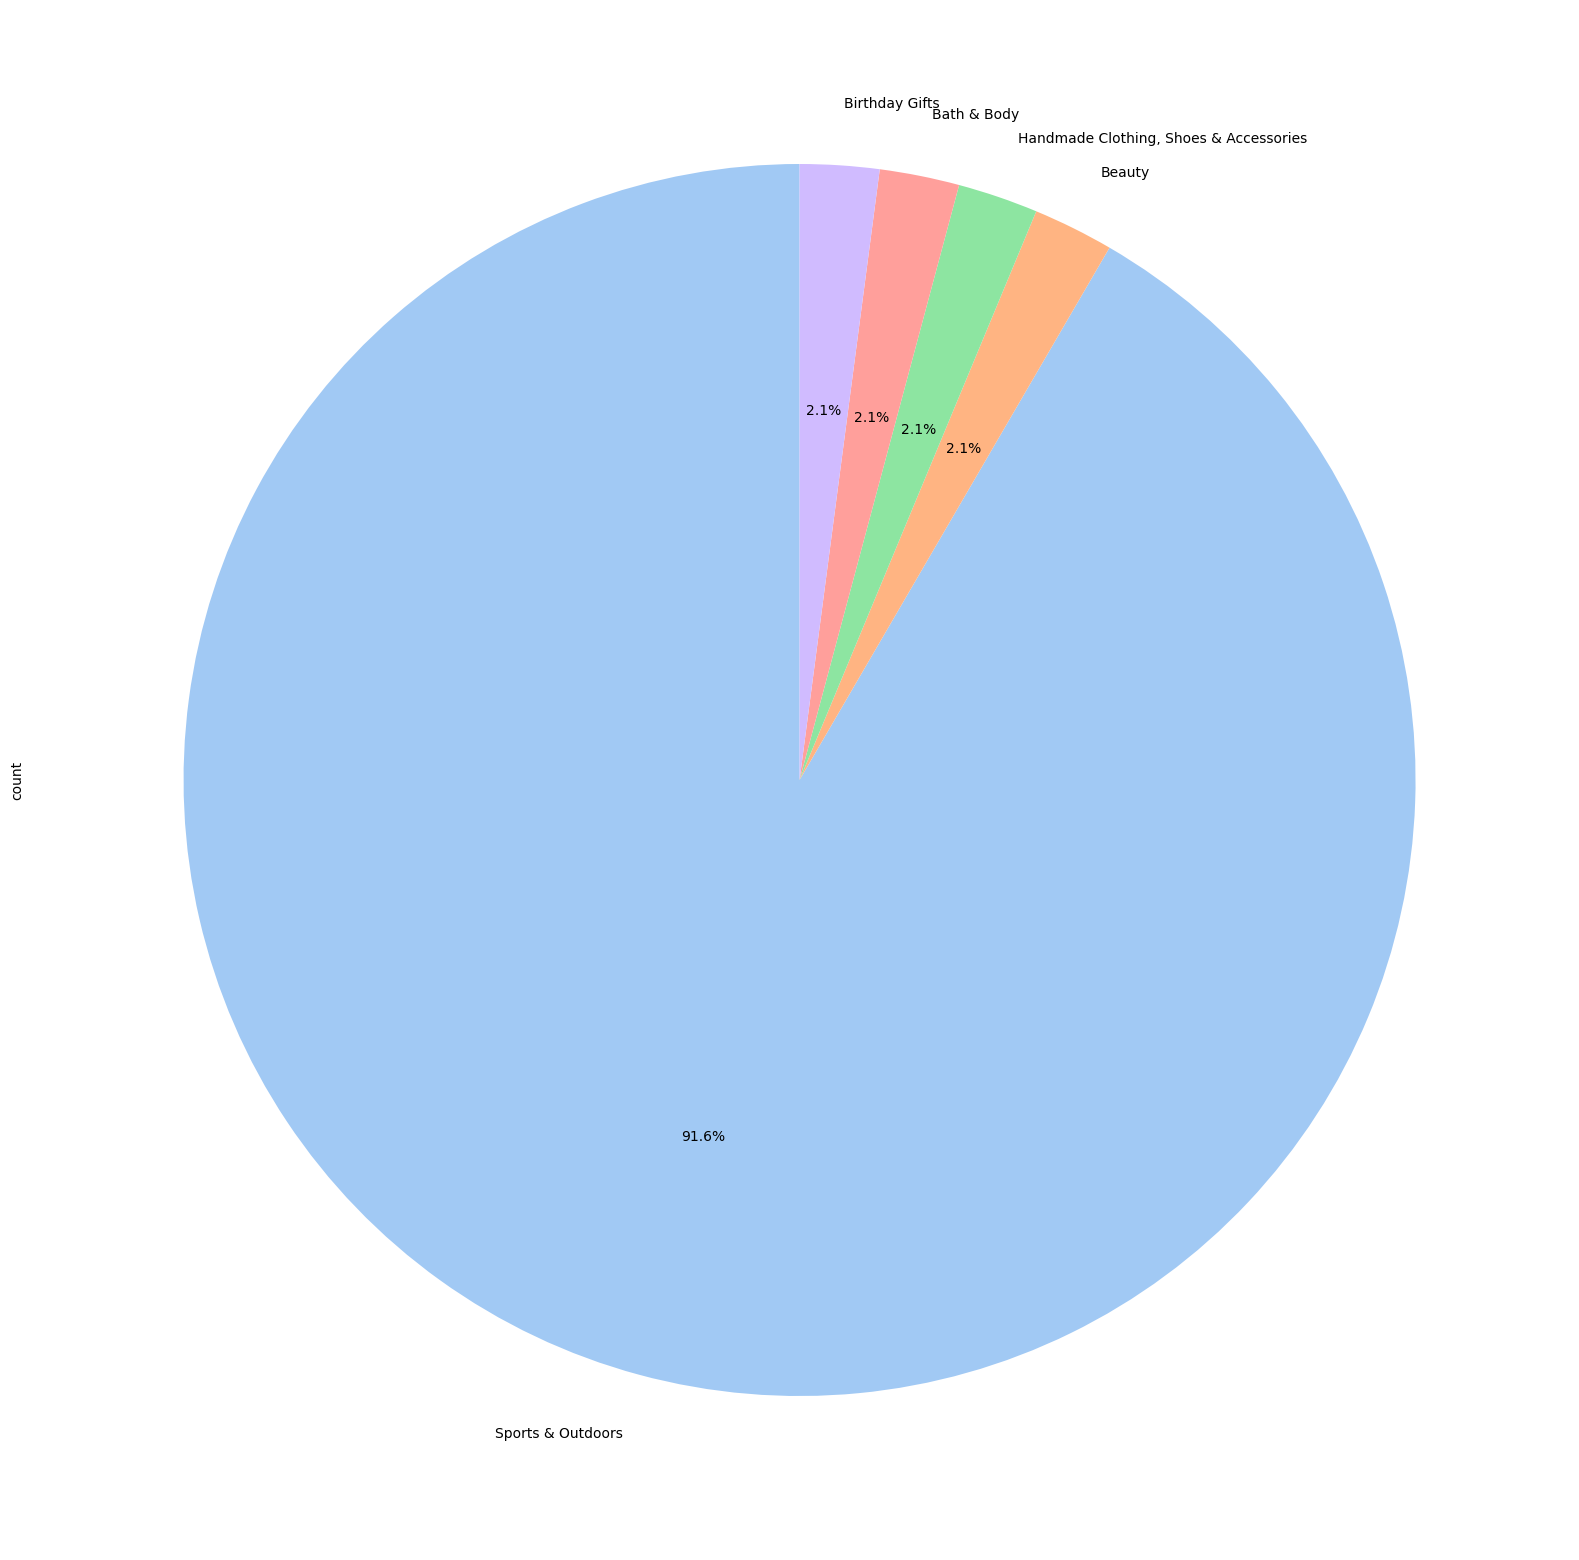

In [60]:
# For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
plt.yticks(fontsize=20)
frequency_table_top5.plot.pie(autopct='%1.1f%%',figsize=(30,20), startangle=90, colors=sns.color_palette("pastel"))

`Does any category dominate the listings?` 
Category Sports & Outdoors dominate the list.

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

---

In [75]:
# Measures of Centrality:
df["price"].describe().round(2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [89]:
# Calculate the mean for the price of products.
mean_price=df["price"].mean().round(2)

# Calculate the median for the price of products.
media_price=df["price"].median()

# Calculate the mode for the price of products.
mode_price=df["price"].mode()

In [91]:
print(f"The mean price is: {mean_price}")
print(f"The median price is: {media_price}")
print(f"The mode price is: {mode_price}")

The mean price is: 89.24
The median price is: 19.09
The mode price is: 0    9.99
Name: price, dtype: float64


`What's the average price point of products listed? How does this compare with the most common price point (mode)?`

El median price es de 89.24 y el mode es 9.99. El precio medio esta muy alejado del mode. 

In [101]:
# Measures of Dispersion:

# Determine the variance, standard deviation, range, and interquartile range for product price.

# Calculate the variance for the price of products.
variance_price=df["price"].var()

# Calculate the standard deviation for the price of products.
std_price=df["price"].std()

# Calculate the range for the price of products.
min_price = df['price'].min()
max_price = df['price'].max()

range_price= max_price - min_price

# Calculate the interquartile range for product price of products.
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])


In [104]:
print(f"The variance price is: {variance_price}")
print(f"The standard deviation price is: {std_price}")
print(f"The range price is: {range_price}")
print("The interquartile range for product price is:")
quantiles_price

The variance price is: 119445.48532256528
The standard deviation price is: 345.60886175352226
The range price is: 100000.0
The interquartile range for product price is:


0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64

`How varied are the product prices? Are there any indicators of a significant spread in prices?`

In [ ]:
# Visualizations:

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

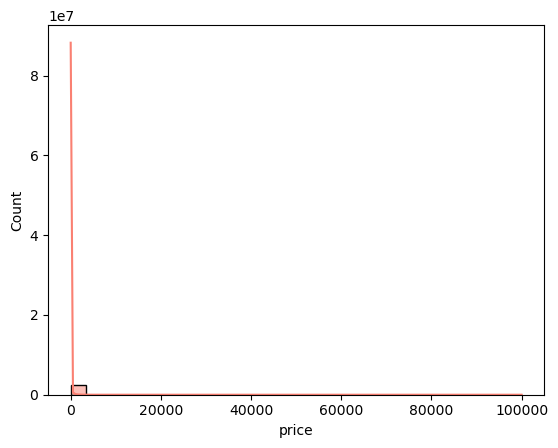

In [107]:
# Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
sns.histplot(df['price'], kde=True, bins=30, color="salmon")

<Axes: >

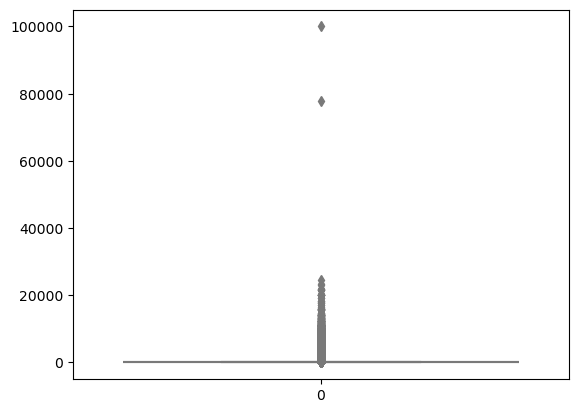

In [108]:
sns.boxplot(data = df['price'], color="lightblue")

`1. Is there a specific price range where most products fall? `

`2. Are there products that are priced significantly higher than the rest?`

Hay muchos productos que el precio es significativamente alto, porque hay muchos outliers. Por eso en el grafico hay variedad de puntos que sobrepasan la linea y que perteneces a más del 75%. Y es imposible de leer o concluir un resultado. 


### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

In [ ]:
# Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [110]:
# Calculate the mean for the price of products.
mean_price=df["stars"].mean().round(2)

# Calculate the median for the price of products.
media_price=df["stars"].median()

# Calculate the mode for the price of products.
mode_price=df["stars"].mode()

In [117]:
print(f"The mean stars is: {mean_price}")
print(f"The median stars is: {media_price}")
print(f"The mode stars is: {mode_price}")

The mean stars is: 2.15
The median stars is: 0.0
The mode stars is: 0    0.0
Name: stars, dtype: float64


`How do customers generally rate products? Is there a common trend?`

El median y mode price son 0, por lo que podemos concluir que normalmente los clientes puntuan muy bajo. 

In [118]:
# Measures of Dispersion:

# Determine the variance, standard deviation, range, and interquartile range for product price.

# Calculate the variance for the price of products.
variance_price=df["stars"].var()

# Calculate the standard deviation for the price of products.
std_price=df["stars"].std()

# Calculate the range for the price of products.
min_price = df['stars'].min()
max_price = df['stars'].max()

range_price= max_price - min_price

# Calculate the interquartile range for product price of products.
quantiles_price = df['stars'].quantile([0.25, 0.5, 0.75])

print(f"The variance stars is: {variance_price}")
print(f"The standard deviation stars is: {std_price}")
print(f"The range stars is: {range_price}")
print("The interquartile range for product price is:")
quantiles_price

The variance stars is: 4.81743402976196
The standard deviation stars is: 2.1948653785054697
The range stars is: 5.0
The interquartile range for product price is:


0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64

`Are the ratings consistent, or is there a wide variation in customer feedback?`

El rating no es consistente debido a como podemos observar, la variance es de 4.81 y el rango es de 5, por lo que se puede concluir que la variance es bastante amplia y no consistente, es extremista segun podemos observar en el resultado de los interquartile. Los clientes suelen votar o muy bajo o muy alto. 

In [119]:
#Shape of the Distribution:

# Calculate the skewness and kurtosis for the rating column.

skewness_price = df['stars'].skew()
kurtosis_price = df['stars'].kurtosis()

print(f"The variance stars is: {skewness_price}")
print(f"The standard deviation stars is: {kurtosis_price}")


The variance stars is: 0.08120735761080985
The standard deviation stars is: -1.9260061280432985


`Are the ratings normally distributed, or do they lean towards higher or lower values?`

El skewness nos muestra que esta distribuido para el lado izquierdo por lo que la mayoría de los valores son bajos. 


In [ ]:
# Visualizations:

# Plot a histogram to visualize the distribution of product ratings. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

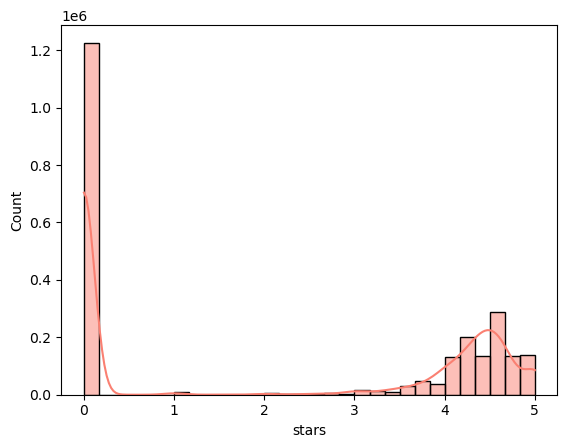

In [115]:
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")

`Is there a specific rating that is more common?`
Si, el 0.